In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc as scmisc
import pandas as pd
import io
import cv2

In [2]:
x_train = np.loadtxt('datasets/train_x.csv', delimiter=',')
y_train = np.loadtxt('datasets/train_y.csv', delimiter=',')
x_test = np.loadtxt('datasets/test_x.csv', delimiter=',')

In [3]:
filteredX_test = x_test
filteredX_test[filteredX_test<240] = 0
xImgFiltTest = filteredX_test.reshape(-1, 64, 64)
new_dataset_test = []
for i,image in enumerate(xImgFiltTest):
    image = xImgFiltTest[i].astype('uint8')

    connectivity = 4  
    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    
    areas = list()
    for k in range (0,stats.shape[0]):
        areas.append(stats[k,2]*stats[k,3])
    max_label=1
    max_size = areas[1]
    for j in range(2, num_labels):
        if areas[j] > max_size:
            max_label = j
            max_size = areas[j]
    preprocessed_img = np.zeros(labels.shape)
    preprocessed_img[labels == max_label] = 255
    new_dataset_test.append(preprocessed_img)


In [4]:
filteredX_train = x_train
filteredX_train[filteredX_train<240] = 0
xImgFiltTrain = filteredX_train.reshape(-1, 64, 64)
new_dataset_train = []
for i,image in enumerate(xImgFiltTrain):
    image = xImgFiltTrain[i].astype('uint8')

    connectivity = 4  
    ret, thresh = cv2.threshold(image,127,255,cv2.THRESH_BINARY)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
    areas = list()
    for k in range (0,stats.shape[0]):
        areas.append(stats[k,2]*stats[k,3])
        
    max_label=1
    max_size = areas[1]
    for j in range(2, num_labels):
        if areas[j] > max_size:
            max_label = j
            max_size = areas[j]
    preprocessed_img = np.zeros(labels.shape)
    preprocessed_img[labels == max_label] = 255
    new_dataset_train.append(preprocessed_img)

(4096,)
(1, 64, 64)


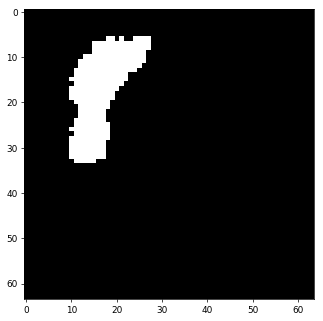

In [6]:
plt.figure(figsize=(15,6), dpi=64)
xImage = x_train[16000]
print(xImage.shape)
xImage = xImage.reshape(-1,64,64)
print(xImage.shape)
imgPlot = plt.imshow(xImage[0], cmap='gray')
imgPlot = plt.imshow(new_dataset_train[16000], cmap='gray')


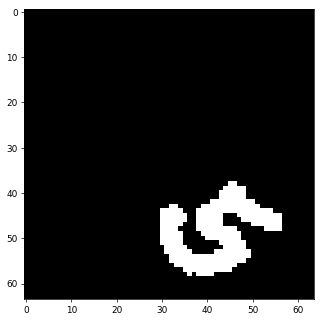

In [29]:
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(new_dataset_train[49000], cmap='gray')

In [7]:
new_dataset_test = np.array(new_dataset_test)
print (new_dataset_test.shape)

new_dataset_train = np.array(new_dataset_train)
print (new_dataset_train.shape)

(10000, 64, 64)
(50000, 64, 64)


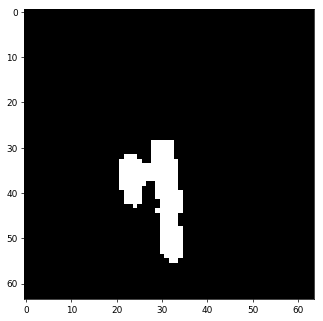

In [9]:
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(new_dataset_test[8000], cmap='gray')
reshaped_test = np.reshape(new_dataset_test, (10000, 4096))
reshaped_train = np.reshape(new_dataset_train, (50000, 4096))

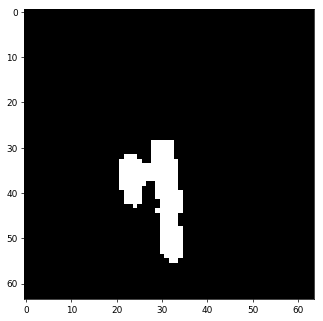

In [10]:
re_reshaped_test = reshaped_test.reshape(10000, 64, 64)
plt.figure(figsize=(15,6), dpi=64)
imgPlot = plt.imshow(re_reshaped_test[8000], cmap='gray')



In [11]:
pd.DataFrame(reshaped_test).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\test_x_preproc.csv',
                                   header = False, sep=',', index = False)
pd.DataFrame(reshaped_train).to_csv(r'C:\Users\Owner\McGill\4thYear\COMP551\kaggle-MNIST\datasets\train_x_preproc.csv',
                                   header = False, sep=',', index = False)


In [39]:
x_train_preproc = np.loadtxt('datasets/train_x_preproc.csv', delimiter=',')


ValueError: cannot reshape array of size 204800000 into shape (10000,64,64)

<Figure size 960x384 with 0 Axes>

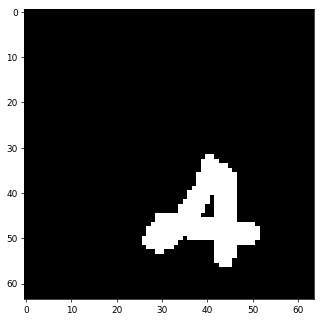

In [41]:
plt.figure(figsize=(15,6), dpi=64)
x_train_preproc = x_train_preproc.reshape(50000,64,64)
imgPlot = plt.imshow(x_train_preproc[10], cmap='gray')